## Finding best neighbourhood to open American restaurant in Seattle
DEVANG JAGDALE\
JULY 12, 2021

### 1.Introduction

#### 1.1 Background
Seattle is a seaport city on the West Coast of the United States. It is the seat of King County, Washington. With a 2019 population of 753,675, it is the largest city in both the state of Washington and the Pacific Northwest region of North America. The Seattle metropolitan area's population is 3.98 million, making it the 15th-largest in the United States. Even though Seattle is such a big city there are very few American Restaurants present there. This lack of authentic American restaurants makes it great market place for a person who wants to open an American style Restaurant in Seattle. Choosing a right location to open a restaurant in such a big city might be a herculean task for any new restaurant owner. With this goal in my mind this capstone project will be helping new entrepreneur to find best Neighbourhood in Seattle to open an American Restaurant.

#### 1.2 Business Problem
Entrepreneur who wants to find best Neighbourhood in Seattle to open an American Restaurant. We can compare all venues present in different neighbourhoods in various boroughs, find out number of restaurants and other competitor places and find out best place by analysing this data. 
### 2.Data acquisition and cleaning
#### 2.1 Requirements
a. We will require all the Borough and Neighbourhoods in it.
b. We will require Latitude and Longitude of each Neighbourhood.
c. We will require all nearby places details in that Neighbourhood.

#### 2.2 Data Resources
a. Wikipedia: https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle use this to solve our first requirement.
b. GeoPy: We will use this package to solve our second requirement.
c. Foursquare API: We will use this API to solve our third requirement.


## Importing libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import folium
from geopy.geocoders import Nominatim
from pandas import json_normalize
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import re

## 1. Scrapping and Explore Dataset

Using BeautifulSoup to scrape data of Seattle neighborhood from wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle"
wiki_url = requests.get(url).text
soup = BeautifulSoup(wiki_url, 'html5lib')

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighborhoods in Seattle - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2f693b6f-7ee1-4f86-a36a-0657428dbfb6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Seattle","wgTitle":"List of neighborhoods in Seattle","wgCurRevisionId":1025878654,"wgRevisionId":1025878654,"wgArticleId":750943,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dea

Converting raw data into dataframe having 2 columns as Borough and Neighborhood

In [4]:
import re
table_contents=[]

#Find all rows in our table
table=soup.find_all('tr')

#from above result, we loop through each row
for tr in table[1:128]:
    
    #use cell as row of our dataframe
    cell = {}
    #we extract all columns from a row
    data=tr.find_all('td')
    c=0;
    #from above columns our required columns are first two, so we loop only two times
    for td in data[:2]:
        #here we remove all [12] [34] such numbers in bracket
        val=re.sub("\[.*?\]","",td.text)
        #this line removes all round brackets and content inside it
        val=re.sub("\(.*?\)","",val)
        #this line removes all \n
        val=re.sub("\n","",val)
        #remove / and take last element from that value eg: if pune/maharashtra is value then we take maharashtra only
        val=val.split('/',1)[-1]
        #if we are looping first time then data of that column is for neighborhood 
        #[-1] is used as at end of each data \n was present so, we take data from index 0 to second last element
        if c==0: cell['Neighborhood']=val
        #if we are looping second time then data of that column is for borough
        if c==1: cell['Borough']=val
        c+=1
    #after completing a row and adding data of columns to cell we get an row for our dataframe
    #here we append that row to table_contents
    table_contents.append(cell)

#here we create dataframe from table_contents
df=pd.DataFrame(table_contents)
df.tail(30)


,Neighborhood,Borough
97,Seward Park,South End
98,Lakewood,Seward Park
99,Beacon Hill,South End
100,North Beacon Hill,Beacon Hill
101,Mid Beacon Hill,Beacon Hill
102,NewHolly,Beacon Hill
103,Van Asselt,Beacon Hill
104,Industrial District,South End
105,SoDo,Industrial District
106,Harbor Island,Industrial District


In [5]:
df.shape

(127, 2)

#### Different types of Borough in Seattle Info

In [6]:
#Differnet Borough in Seattle
df['Borough'].unique()

array(['Seattle', 'North Seattle', 'Northgate', 'Lake City',
       ' North Seattle', ' University District',
       ' Lower Wallingford, spilling over into Fremont and the University District.',
       'Ballard', 'Central Seattle', 'Magnolia', 'Queen Anne',
       'Capitol Hill', ' Broadway', ' Central Seattle', ' Stevens',
       ' Stevens / Central Seattle', 'Madison Park', 'Lake Union',
       'South Lake Union', 'Downtown', 'Central Area', 'Minor',
       'Atlantic', 'Madrona', 'Denny-Blaine', 'South End',
       'Rainier Valley', ' Columbia City', 'Seward Park', 'Beacon Hill',
       'Industrial District', 'West Seattle', ' South End', 'Delridge'],
      dtype=object)

In [7]:
#Count of Unique borough's in Seattle
df['Borough'].nunique()

34

Creating new column named location to get lat and lang for each neighbourhood

In [8]:
df['Location']=df['Neighborhood']+',Seattle'
df

,Neighborhood,Borough,Location
0,North Seattle,Seattle,"North Seattle,Seattle"
1,Broadview,North Seattle,"Broadview,Seattle"
2,Bitter Lake,North Seattle,"Bitter Lake,Seattle"
3,Blue Ridge,North Seattle,"Blue Ridge,Seattle"
4,Crown Hill,North Seattle,"Crown Hill,Seattle"
...,...,...,...
122,Riverview,Delridge,"Riverview,Seattle"
123,Highland Park,Delridge,"Highland Park,Seattle"
124,South Delridge,Delridge,"South Delridge,Seattle"
125,Roxhill,Delridge,"Roxhill,Seattle"


Using geopy to get latitude, longitude and altitude for each neighbourhood

In [9]:
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0)
# 2- apply geocode and get exact location address
df['Location'] = df['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['Point'] = df['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['Latitude', 'Longitude', 'Altitude']] = pd.DataFrame(df['Point'].tolist(), index=df.index)

In [10]:
df

,Neighborhood,Borough,Location,Point,Latitude,Longitude,Altitude
0,North Seattle,Seattle,"(Mount Baker Ridge Tunnel (old bore, north), 3...","(47.590054550000005, -122.29145496064257, 0.0)",47.590055,-122.291455,0.0
1,Broadview,North Seattle,"(Broadview, Seattle, King County, Washington, ...","(47.7223199, -122.3604067, 0.0)",47.722320,-122.360407,0.0
2,Bitter Lake,North Seattle,"(Bitter Lake, Seattle, King County, Washington...","(47.7262358, -122.3487639, 0.0)",47.726236,-122.348764,0.0
3,Blue Ridge,North Seattle,"(Blue Ridge, Seattle, King County, Washington,...","(47.7014866, -122.3754069, 0.0)",47.701487,-122.375407,0.0
4,Crown Hill,North Seattle,"(Crown Hill, Greenwood, Seattle, King County, ...","(47.6947154, -122.3714586, 0.0)",47.694715,-122.371459,0.0
...,...,...,...,...,...,...,...
122,Riverview,Delridge,"(Riverview Playfield, Delridge, Seattle, King ...","(47.539382700000004, -122.34918871766783, 0.0)",47.539383,-122.349189,0.0
123,Highland Park,Delridge,"(Highland Park, Seattle, King County, Washingt...","(47.528432, -122.3526261, 0.0)",47.528432,-122.352626,0.0
124,South Delridge,Delridge,"(Seattle Chinese Garden, 6000, 16th Avenue Sou...","(47.55263295, -122.35270506785001, 0.0)",47.552633,-122.352705,0.0
125,Roxhill,Delridge,"(Roxhill Bog, Westwood, Seattle, King County, ...","(47.519865550000006, -122.3678127860065, 0.0)",47.519866,-122.367813,0.0


## 2. Data Cleaning and Data Preprocessing

Checking for nan values in our dataframe

In [11]:
df.isna().sum()

Neighborhood    0
Borough         0
Location        7
Point           7
Latitude        7
Longitude       7
Altitude        7
dtype: int64

We don't require altitude , point and location column so we remove these columns from our dataframe

In [12]:
df.drop(columns=['Location', 'Point', 'Altitude'], inplace = True, axis = 1)

From checking nan values we get that there are 7 such values.
Now we have two options either remove these values from our dataframe or add them manually.
Both approach are implemented below

#### Add values manually

In [13]:
df['Latitude'][9]=47.6978
df['Longitude'][9]=-122.3376
df['Latitude'][80]=47.6082
df['Longitude'][80]=-122.3093
df['Latitude'][111]=47.5812
df['Longitude'][111]=-122.3866
df['Latitude'][101]=47.5526
df['Longitude'][101]=-122.3009
df['Latitude'][104]=47.5640
df['Longitude'][104]=-122.3343
df['Latitude'][112]=47.5612
df['Longitude'][112]=-122.3866
df['Latitude'][113]=47.5629
df['Longitude'][113]=-122.4041

C:\Users\Devang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Devang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Devang\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

we check again and find zero nan values in dataframe

In [14]:
df.isna().sum()

Neighborhood    0
Borough         0
Latitude        0
Longitude       0
dtype: int64

In [15]:
df.head()

,Neighborhood,Borough,Latitude,Longitude
0,North Seattle,Seattle,47.590055,-122.291455
1,Broadview,North Seattle,47.722320,-122.360407
2,Bitter Lake,North Seattle,47.726236,-122.348764
3,Blue Ridge,North Seattle,47.701487,-122.375407
4,Crown Hill,North Seattle,47.694715,-122.371459


### Run below two cells if you don't want to add lat and lang manually

In [17]:
# #run this statement if you don't want to add lat and lang manually
# new_df=df.dropna()
# new_df.head()

In [16]:
# print(new_df.isna().sum())
# print(new_df.shape)

## 3. Data Analysis

### Use geopy library to get the latitude and longitude values of Seattle

In [17]:
address = 'Seattle'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(98108)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.5474373035838, -122.3106638384082.


### Create a map of Seattle with neighborhoods superimposed on top.

result of below code will look like this

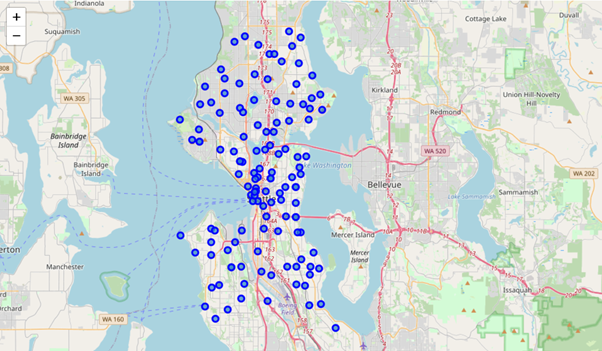

In [18]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'],df['Longitude'],df['Borough'],df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

Here we get number of different neighbourhood in each Borough

In [19]:
df.groupby('Borough')['Neighborhood'].count()

Borough
 Broadway                                                                       1
 Central Seattle                                                                3
 Columbia City                                                                  1
 Lower Wallingford, spilling over into Fremont and the University District.     1
 North Seattle                                                                  1
 South End                                                                      1
 Stevens                                                                        2
 Stevens / Central Seattle                                                      1
 University District                                                            1
Atlantic                                                                        1
Ballard                                                                         5
Beacon Hill                                                                     4
Capitol 

#### Plotting above data into bar graph

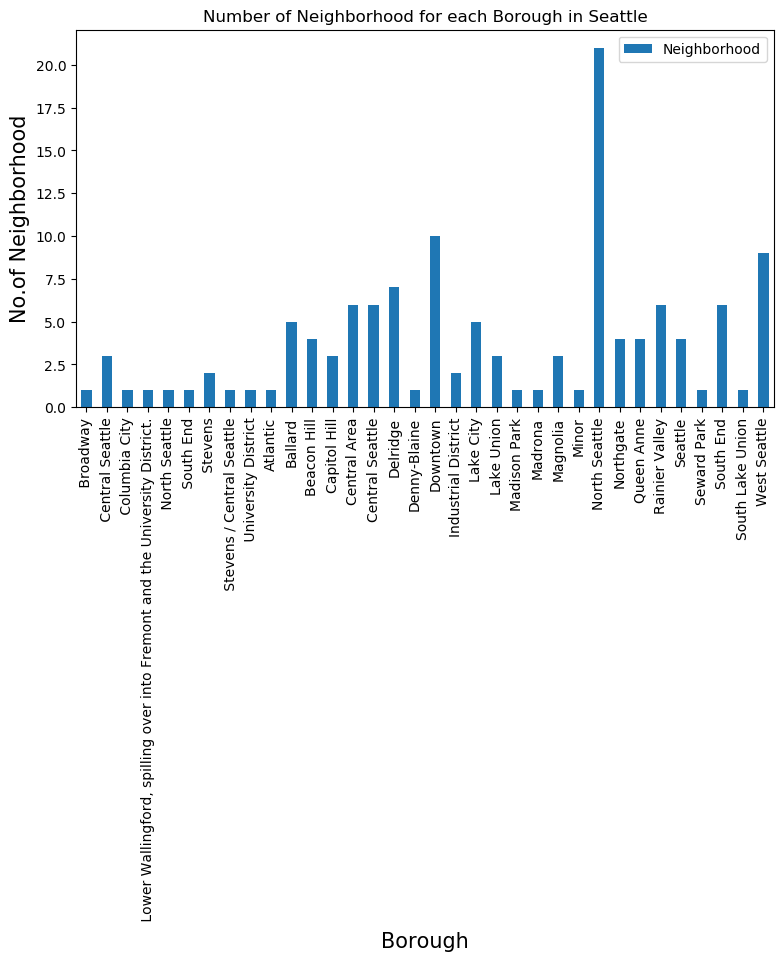

In [20]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Seattle')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Define Foursquare Credentials and Version

In [21]:
CLIENT_ID = 'ZX0TIID2N2GMPLPKUDJWILJOQRYSNPPOF2HGIC2KBZZGYPKJ' # your Foursquare ID
CLIENT_SECRET = 'P1D1DHSTZ0B5DUKJRBUWBGOZWCSSM2HSFI03IK2IYNJP5Y3I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZX0TIID2N2GMPLPKUDJWILJOQRYSNPPOF2HGIC2KBZZGYPKJ
CLIENT_SECRET:P1D1DHSTZ0B5DUKJRBUWBGOZWCSSM2HSFI03IK2IYNJP5Y3I


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [22]:
df.loc[0, 'Neighborhood']

'North Seattle'

Get the neighborhood's latitude and longitude values.

In [23]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of North Seattle are 47.590054550000005, -122.29145496064257.


#### Now, let's get the top 100 venues that are in North Seattle within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [24]:
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZX0TIID2N2GMPLPKUDJWILJOQRYSNPPOF2HGIC2KBZZGYPKJ&client_secret=P1D1DHSTZ0B5DUKJRBUWBGOZWCSSM2HSFI03IK2IYNJP5Y3I&v=20180605&ll=47.590054550000005,-122.29145496064257&radius=500&limit=100'

Send the GET request and examine the resutls

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ed14d0ab914806a11819dd'},
 'response': {'headerLocation': 'Mount Baker',
  'headerFullLocation': 'Mount Baker, Seattle',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 47.59455455450001,
    'lng': -122.28479511639932},
   'sw': {'lat': 47.5855545455, 'lng': -122.29811480488581}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b1bf510f964a520a0ff23e3',
       'name': 'Mt Baker Ridge Viewpoint',
       'location': {'address': '1403 31st Ave. S',
        'lat': 47.58974605166204,
        'lng': -122.2924320432909,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.58974605166204,
          'lng': -122.2924320432909}],
        'distance': 80,
        'postalCo

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mt Baker Ridge Viewpoint,Scenic Lookout,47.589746,-122.292432
1,QED Coffee,Coffee Shop,47.589677,-122.292358
2,East Portal Viewpoint,Scenic Lookout,47.590412,-122.288911
3,Heyday,New American Restaurant,47.590477,-122.292367
4,Mt. Baker Bike Tunnel,Trail,47.590674,-122.288552


In [28]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


### Explore Neighborhoods in Seattle

#### Let's create a function to repeat the same process to all the neighborhoods in Seattle

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
seattle_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [31]:
print(seattle_venues.shape)
seattle_venues.head()

(3451, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Seattle,47.590055,-122.291455,Mt Baker Ridge Viewpoint,47.589746,-122.292432,Scenic Lookout
1,North Seattle,47.590055,-122.291455,QED Coffee,47.589677,-122.292358,Coffee Shop
2,North Seattle,47.590055,-122.291455,East Portal Viewpoint,47.590412,-122.288911,Scenic Lookout
3,North Seattle,47.590055,-122.291455,Heyday,47.590477,-122.292367,New American Restaurant
4,North Seattle,47.590055,-122.291455,Mt. Baker Bike Tunnel,47.590674,-122.288552,Trail


In [32]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Admiral District,44,44,44,44,44,44
Atlantic City Beach,13,13,13,13,13,13
Blue Ridge,4,4,4,4,4,4
Central District,18,18,18,18,18,18
Denny-Blaine,9,9,9,9,9,9
...,...,...,...,...,...,...
West Woodland,36,36,36,36,36,36
Westlake,100,100,100,100,100,100
Whittier Heights,16,16,16,16,16,16


In [33]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 316 uniques categories.


#### Gathering nearby venues for each neighbourhood and preparing a list of neighbourhoods that contains american resturants

In [34]:
def get_venues(lat,lng):    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df1 = pd.DataFrame(venue_details,columns=column_names)
    return df1

In [35]:
# prepare neighborhood list that contains american resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
american_rest=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Neighborhood, Borough, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    american_resturants=venues[venues['Category']=='American Restaurant']   
    print('(',count,'/',len(df),')','American Resturants in '+Neighborhood+', '+Borough+':'+str(len(american_resturants)))
    for resturant_detail in american_resturants.values.tolist():
        id, name , category=resturant_detail
        american_rest = american_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 127 ) American Resturants in North Seattle, Seattle:0
( 2 / 127 ) American Resturants in Broadview, North Seattle:0
( 3 / 127 ) American Resturants in Bitter Lake, North Seattle:0
( 4 / 127 ) American Resturants in  Blue Ridge, North Seattle:0
( 5 / 127 ) American Resturants in Crown Hill, North Seattle:1
( 6 / 127 ) American Resturants in Greenwood, North Seattle:0
( 7 / 127 ) American Resturants in Northgate, North Seattle:0
( 8 / 127 ) American Resturants in Haller Lake, Northgate:0
( 9 / 127 ) American Resturants in Pinehurst, Northgate:0
( 10 / 127 ) American Resturants in North College Park, Northgate:0
( 11 / 127 ) American Resturants in Maple Leaf, Northgate:0
( 12 / 127 ) American Resturants in Lake City, North Seattle:0
( 13 / 127 ) American Resturants in Cedar Park, Lake City:0
( 14 / 127 ) American Resturants in Matthews Beach, Lake City:0
( 15 / 127 ) American Resturants in Meadowbrook, Lake City:0
( 16 / 127 ) American Resturants in Olympic Hills, Lake City:0
( 17 /

In [36]:
american_rest.head()

,Borough,Neighborhood,ID,Name
0,North Seattle,Crown Hill,47ea2c2ef964a520634e1fe3,Wild Mountain Cafe
1,North Seattle,Ravenna,4b115d5ef964a520f97a23e3,Ravenna's Varsity Restaurant
2,North Seattle,Hawthorne Hills,48932deaf964a52064511fe3,Sand Point Grill
3,University District,University Village,4c71a6487121a1cdb69b60d1,Dante's Inferno Dogs University Village Mobile...
4,North Seattle,Wallingford,421a7600f964a5209a1f1fe3,Julia's in Wallingford


In [37]:
american_rest.shape

(60, 4)

#### Plotting graph for number american restaurants in each borough

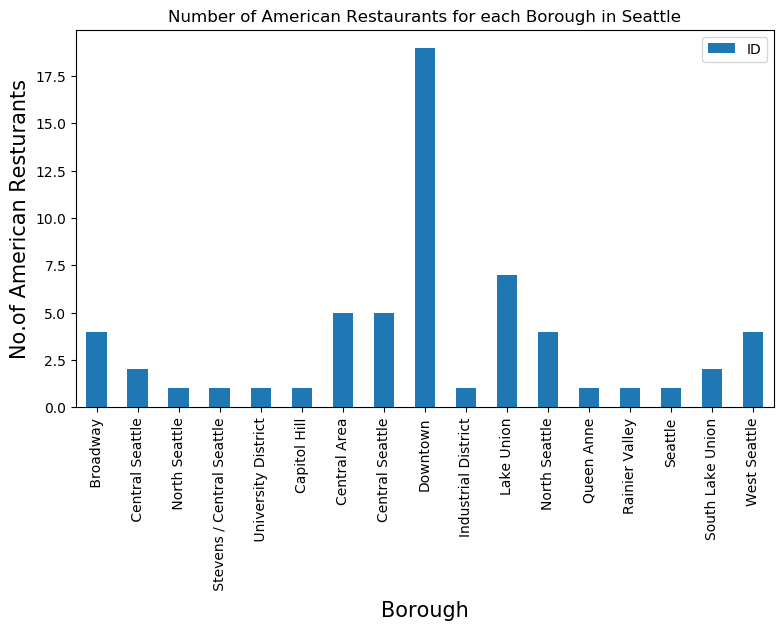

In [38]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of American Restaurants for each Borough in Seattle')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of American Resturants', fontsize=15)
#giving a bar plot
american_rest.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

#### Plotting graph for number american restaurants in each neighbourhood

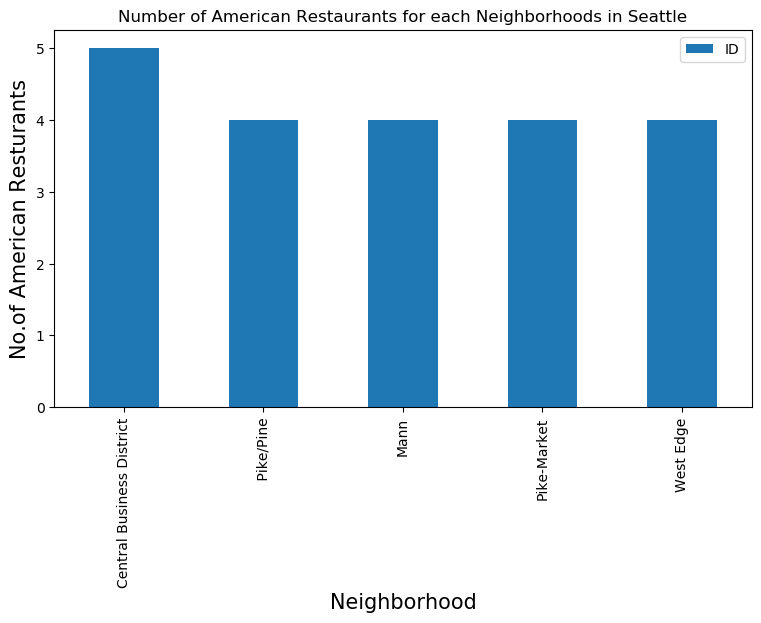

In [39]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of American Restaurants for each Neighborhoods in Seattle')
#On x-axis
plt.xlabel('Neighborhoods', fontsize = 15)
#On y-axis
plt.ylabel('No.of American Resturants', fontsize=15)
#giving a bar plot
american_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Analyze Each Neighborhood

In [66]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
seattle_onehot.shape

(3451, 316)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [68]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Admiral District,0.000000,0.0,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.022727,0.00,0.0,0.0,0.00,0.00,0.000000
1,Atlantic City Beach,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000
2,Blue Ridge,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000
3,Central District,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000
4,Denny-Blaine,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Woodland,0.611111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.027778
121,Westlake,0.000000,0.0,0.0,0.0,0.0,0.030000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020000,0.01,0.0,0.0,0.02,0.01,0.000000
122,Whittier Heights,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000
123,Windermere,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000


In [69]:
seattle_grouped.shape

(125, 316)

#### Let's print each neighborhood along with the top 5 most common venues

In [70]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Admiral District----
             venue  freq
0      Coffee Shop  0.11
1              Pub  0.05
2  Thai Restaurant  0.05
3          Theater  0.05
4           Market  0.02


---- Atlantic City Beach----
                   venue  freq
0             Restaurant  0.08
1  Vietnamese Restaurant  0.08
2    Fried Chicken Joint  0.08
3   Gym / Fitness Center  0.08
4     Mexican Restaurant  0.08


---- Blue Ridge----
           venue  freq
0  Garden Center  0.25
1           Café  0.25
2           Park  0.25
3           Pool  0.25
4       Pharmacy  0.00


---- Central District ----
                   venue  freq
0            Coffee Shop  0.17
1  Performing Arts Venue  0.11
2         Breakfast Spot  0.06
3   Ethiopian Restaurant  0.06
4                    Gym  0.06


---- Denny-Blaine----
                 venue  freq
0                 Park  0.56
1            Surf Spot  0.11
2           Playground  0.11
3  Monument / Landmark  0.11
4                Beach  0.11


---- Lakeridge----
         venu

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiral District,Coffee Shop,Theater,Thai Restaurant,Pub,Spa,Field,Bakery,Bank,Bar,Middle Eastern Restaurant
1,Atlantic City Beach,Pharmacy,Harbor / Marina,Coffee Shop,Gym / Fitness Center,Marijuana Dispensary,Vietnamese Restaurant,Garden Center,Garden,Discount Store,Salon / Barbershop
2,Blue Ridge,Pool,Park,Garden Center,Café,Flower Shop,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
3,Central District,Coffee Shop,Performing Arts Venue,BBQ Joint,Art Gallery,Fish & Chips Shop,Chinese Restaurant,Liquor Store,Gym,Ethiopian Restaurant,Pizza Place
4,Denny-Blaine,Park,Surf Spot,Monument / Landmark,Beach,Playground,Flower Shop,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop


## 4. Cluster Neighborhoods

Now we can use KMeans clustering method to cluster the neighborhoods.

First we need to determine how many clusters to use. This will be done using the Silhouette Score.

We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [84]:
from sklearn.metrics import silhouette_score
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = seattle_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

Now we plot a graph for Silhouette Scores for each number of clusters

[0.265101505829958, 0.27436055898243805, 0.2846461560678526, 0.26501269556179224, 0.267073699571859, 0.22062198852716502, 0.1462328158199049, 0.2740559342362408, 0.25320813489240623, 0.2641730796891719, 0.2643826391305787, 0.26745875572216493, 0.05556327447348551, 0.06036757390789771]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


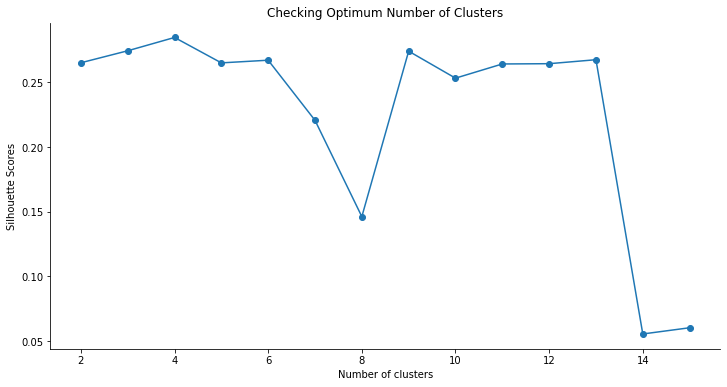

In [85]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
print(scores)
print(kval)
plot(kval, scores)

From above graph we see that 3 clusters give best results so run k-means to cluster the neighborhood into 3 clusters.

In [75]:
# set number of clusters
kclusters = 4

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 0, 1, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [76]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.tail() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
122,Riverview,Delridge,47.539383,-122.349189,1.0,Trail,Park,Baseball Field,Bus Station,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
123,Highland Park,Delridge,47.528432,-122.352626,3.0,Gym,Home Service,Baseball Field,Playground,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
124,South Delridge,Delridge,47.552633,-122.352705,0.0,Garden,Bakery,Business Service,Gaming Cafe,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop
125,Roxhill,Delridge,47.519866,-122.367813,0.0,Coffee Shop,Cosmetics Shop,Pizza Place,Bowling Alley,Thai Restaurant,Gas Station,Big Box Store,Mattress Store,Furniture / Home Store,Supermarket
126,High Point,Delridge,47.538451,-122.377387,0.0,Spa,Bus Station,Park,Eye Doctor,Field,Playground,Gym / Fitness Center,Brewery,Food & Drink Shop,Food


we drop rows having any nan values and convert cluster labels column from float to int

In [77]:
seattle_merged=seattle_merged.dropna()
seattle_merged.shape
seattle_merged["Cluster Labels"]=seattle_merged["Cluster Labels"].apply(np.int64)
seattle_merged.tail(60)

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Eastlake,Lake Union,47.640825,-122.325723,0,Sandwich Place,Coffee Shop,Italian Restaurant,Playground,Bus Stop,Pizza Place,General Travel,Ethiopian Restaurant,Bar,Thai Restaurant
66,Downtown,Central Seattle,47.598122,-122.328053,0,Chinese Restaurant,Coffee Shop,Sports Bar,General Entertainment,Bubble Tea Shop,Japanese Restaurant,Lounge,History Museum,Stadium,Tea Room
67,Denny Triangle,Downtown,47.618565,-122.337059,0,Coffee Shop,Hotel,Food Truck,Café,Mexican Restaurant,Bar,Italian Restaurant,Convenience Store,Pizza Place,Spa
68,Belltown,Downtown,47.613231,-122.345361,0,Coffee Shop,Bar,Hotel,Sushi Restaurant,Bakery,Seafood Restaurant,Breakfast Spot,Cocktail Bar,Pizza Place,Furniture / Home Store
69,Pike-Market,Downtown,47.619002,-122.319851,0,Bar,Coffee Shop,Mexican Restaurant,American Restaurant,Salon / Barbershop,Smoke Shop,Pizza Place,Thrift / Vintage Store,Cocktail Bar,Taco Place
70,Central Business District,Downtown,47.609532,-122.336290,0,Coffee Shop,Hotel,American Restaurant,Breakfast Spot,Cocktail Bar,Seafood Restaurant,Clothing Store,Women's Store,Theater,French Restaurant
71,First Hill,Downtown,47.609305,-122.324984,0,Sandwich Place,Coffee Shop,Hotel,Asian Restaurant,Pharmacy,Pizza Place,Food & Drink Shop,Restaurant,Bakery,Bar
72,Pioneer Square,Downtown,47.602139,-122.333927,0,Coffee Shop,Cocktail Bar,Café,Seafood Restaurant,Donut Shop,Hotel,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Bar
73,International District,Downtown,47.602023,-122.339865,0,Seafood Restaurant,Gift Shop,Coffee Shop,Boat or Ferry,Burger Joint,Hotel,Italian Restaurant,Japanese Restaurant,Harbor / Marina,Cocktail Bar
74,Yesler Terrace,Downtown,47.601266,-122.319159,0,Vietnamese Restaurant,Chinese Restaurant,Performing Arts Venue,Other Repair Shop,Grocery Store,Bubble Tea Shop,Noodle House,Garden,Juice Bar,History Museum


Finally, let's visualize the resulting clusters

result of below code will look like this

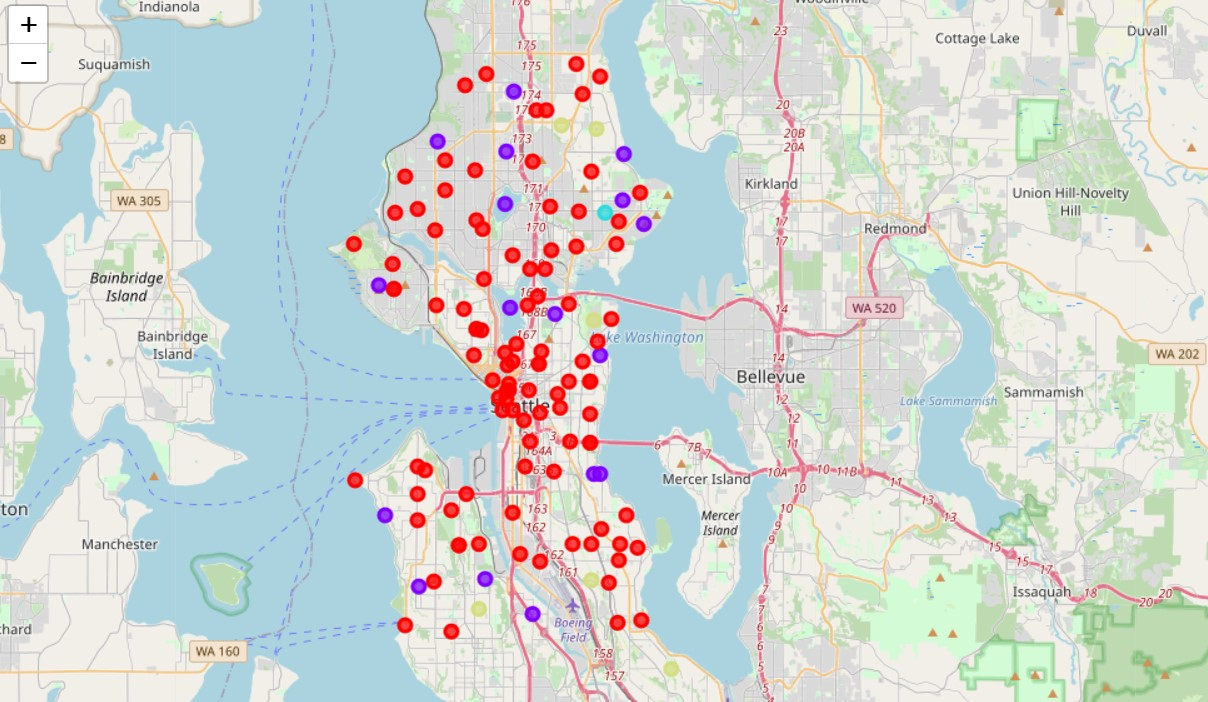

In [83]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
#     print(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

#### Cluster 1

In [79]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0,1] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,Seattle,Trail,Scenic Lookout,Coffee Shop,New American Restaurant,Italian Restaurant,Pet Store,Garden,Pier,Bus Stop,Filipino Restaurant
1,Broadview,North Seattle,Furniture / Home Store,Beer Bar,Sushi Restaurant,Convenience Store,Antique Shop,Food Truck,Thai Restaurant,Video Store,Pizza Place,Fast Food Restaurant
2,Bitter Lake,North Seattle,Fast Food Restaurant,Hotpot Restaurant,Noodle House,Bank,Gym,Grocery Store,Thrift / Vintage Store,Thai Restaurant,Szechuan Restaurant,Furniture / Home Store
4,Crown Hill,North Seattle,Coffee Shop,Mexican Restaurant,Grocery Store,Sports Bar,Fast Food Restaurant,American Restaurant,Taco Place,Burger Joint,Pet Store,Sandwich Place
5,Greenwood,North Seattle,Coffee Shop,Bar,Mexican Restaurant,Bookstore,Spa,Pizza Place,Cheese Shop,Supermarket,Thai Restaurant,Theater
...,...,...,...,...,...,...,...,...,...,...,...,...
120,North Delridge,Delridge,Gas Station,Vietnamese Restaurant,Trail,Restaurant,Pet Service,Convenience Store,Park,Playground,Pizza Place,Filipino Restaurant
121,Pigeon Point,Delridge,Coffee Shop,Restaurant,Sandwich Place,Music Venue,Bar,Beer Bar,Trail,Food Truck,French Restaurant,Farm
124,South Delridge,Delridge,Garden,Bakery,Business Service,Gaming Cafe,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop
125,Roxhill,Delridge,Coffee Shop,Cosmetics Shop,Pizza Place,Bowling Alley,Thai Restaurant,Gas Station,Big Box Store,Mattress Store,Furniture / Home Store,Supermarket


#### Cluster 2

In [80]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0,1] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Blue Ridge,North Seattle,Pool,Park,Garden Center,Café,Flower Shop,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
7,Haller Lake,Northgate,Dance Studio,Park,Coffee Shop,Lake,Zoo,Fish Market,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
9,North College Park,Northgate,Community College,Advertising Agency,Park,Zoo,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
13,Matthews Beach,Lake City,Trail,Park,Playground,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
18,View Ridge,North Seattle,Park,Food,Construction & Landscaping,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
23,Windermere,North Seattle,Greek Restaurant,Pizza Place,Park,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
30,Green Lake,North Seattle,Park,Tennis Court,Beach,Theater,Trail,Food Stand,Food Court,Food & Drink Shop,Food,Flower Shop
36,Adams,Ballard,Park,Pet Store,Bar,Harbor / Marina,Convenience Store,Pizza Place,Café,Lake,Filipino Restaurant,Farmers Market
42,Briarcliff,Magnolia,Trail,Park,Athletics & Sports,Bus Stop,Fish Market,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
56,Interlaken,Stevens,Park,Scenic Lookout,Playground,Zoo,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


#### Cluster 3

In [81]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0,1] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Bryant,North Seattle,Organic Grocery,Zoo,Food,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop


In [82]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[0,1] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Meadowbrook,Lake City,Pizza Place,Coffee Shop,Playground,Soccer Field,Zoo,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field
16,Victory Heights,Lake City,Garden,Playground,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
60,Broadmoor,Madison Park,Soccer Field,Garden,Park,Golf Course,Playground,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field
96,Lakeridge,Rainier Valley,Park,Playground,Bus Stop,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
102,NewHolly,Beacon Hill,Playground,Park,Zoo,Fair,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
123,Highland Park,Delridge,Gym,Home Service,Baseball Field,Playground,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


## Results and Discussion

After scrapping data from wikipedia we get 127 neighbourhoods and 34 Borough in Seattle.
From above analysis shows that there are many restaurants present in Seattle out of which only 60 restaurants are American restaurants. Out of which most of the American restaurants in Neighbourhoods are present in Downtown, Lake Union, Central Area, West Seattle and Broadway. Highest number of American restaurants in Borough are in Downtown and in Neighbourhoods are in Central Business District. 
After performing k-means clustering for k=4 we get 4 different clusters out of which cluster 1 is the largest followed by cluster 2 , cluster 4 and then cluster 3.


## Conclusion

If we take careful look we see that Downtown has highest number of American restaurants and all the downtown neighbourhoods are present in cluster 1. In Cluster 1 there is a lot of competition but there is an upside that is people might be familiar with American restaurants taste and if new restaurant has best taste it might work. Cluster 2 has different types of resturants and cafe in its top 10 venues which shows that people are open to different tastes and as there is no American restaurant in there top 10 venues new American restaurants might have a chance. Cluster 3 and 4 is cluster which has liking of Fast Food Filipino and Falafel Restaurants so opening new American restaurant there might be a challenging task.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.